|<img  src="http://pierreproulx.espaceweb.usherbrooke.ca/images/usherb_transp.gif" > |Pierre Proulx, ing, professeur|
|:---|:---|
|Département de génie chimique et de génie biotechnologique |** GCH200-Phénomènes d'échanges I **|

### Section 2.5 Écoulement de deux fluides visqueux adjacents sur un plan.
> Pour cet exemple on ira directement à l'équation diférentielle puisqu'on a déjà fait le même type de bilans à la section 2.2 en détails. 


><img src='http://pierreproulx.espaceweb.usherbrooke.ca/images/Chap-2-Section-2-5.png'>


In [1]:
#
# Pierre Proulx
#
# Préparation de l'affichage et des outils de calcul symbolique
#
import sympy as sp
from IPython.display import *
sp.init_printing(use_latex=True)
import matplotlib.pyplot as plt

In [2]:
# définition des variables symboliques et des lois de Newton, voir figure ci-haut
x,p_0,p_L,mu1,mu2,L,B = sp.symbols('x,p_0,p_L,mu_I,mu_II,L,B')
tau_xz1 = sp.symbols('tau_xz^I')
tau_xz2 = sp.symbols('tau_xz^II')
C11,C12,C21,C22,C1,C2 = sp.symbols('C_11,C_12,C_21,C_22,C1,C2')
vz1 = sp.Function('v_z^I')(x)
vz2 = sp.Function('v_z^II')(x)
#
# Lois de Newton
#
newton1 = -mu1*sp.Derivative(vz1, x) 
newton2 = -mu2*sp.Derivative(vz2, x)

#### Le bilan est identique à celui fait dans la section 2, sans la gravité, alors le résultat est simple, pour chacun des deux fluides on a le résultat du bilan montré sur la figure ci-haut:

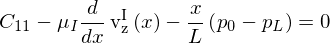

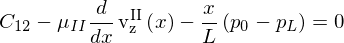

In [3]:
# Bilan des forces
eq1 = sp.Eq(tau_xz1(x)-(p_0-p_L)*x/L+C11)
eq2 = sp.Eq(tau_xz2(x)-(p_0-p_L)*x/L+C12)

eq1 = eq1.subs(tau_xz1(x), newton1)
eq2 = eq2.subs(tau_xz2(x), newton2)

display(eq1)
display(eq2)

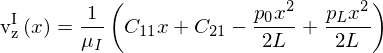

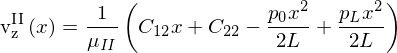

In [4]:
vz1=sp.dsolve(eq1,vz1)
vz2=sp.dsolve(eq2,vz2)
#
# Chaque dsolve génère une nouvelle constante par intégration, On les renomme ici pour respecter notre 
# convention. Vous pouvez vérifier en faisant display des vz avant ces remplacements. On veut avoir
# la même notation que celle de Transport Phenomena autant que possible.
#
vz1=vz1.subs(C1,C21)
vz2=vz2.subs(C1,C22)

display(vz1)
display(vz2)                

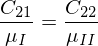

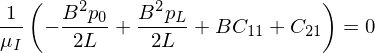

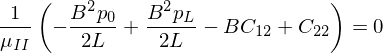

In [5]:
# On peut solutionner directement les 4 constantes avec les 4 conditions aux limites
#
# Ici étant donné qu'on travaille avec sympy qui fera la solution automatiquement, on ne se préocuppe
# pas de décomposer le problème en plusieurs morceaux, on va directement à 4 équations et 4 inconnues
# en fonction des 4 conditions aux limites
#
vz1=vz1.rhs                 # prendre la partie de droite nous simplifiera les manips après
vz2=vz2.rhs

conditions = [
    sp.Eq(vz1.subs(x,0), vz2.subs(x,0)),                               # vitesses égales à l'interface
    sp.Eq(mu1*sp.diff(vz1,x).subs(x,0), mu2*sp.diff(vz2,x).subs(x,0)), # cisaillement égaux
    sp.Eq(vz1.subs(x,B),0),                                            # non glissement
    sp.Eq(vz2.subs(x,-B),0)]                                           # non glissement

display(*conditions)

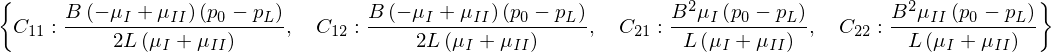

In [6]:
constantes = sp.solve(conditions, sp.symbols('C_11,C_12,C_21,C_22')) 
display(constantes)

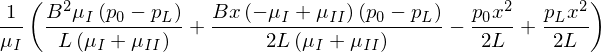

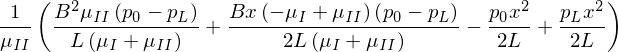

In [7]:
vz1=vz1.subs(constantes)
vz2=vz2.subs(constantes)

display(vz1)
display(vz2)

### Maintenant on tracera les profils en variant les viscosités.

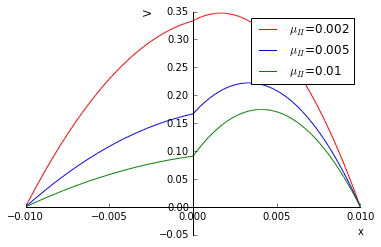

In [8]:
dico = {
    'mu_I':0.001,
    'mu_II':0.002,
    'B':0.01, 
    'L':10,
    'p_0':100,
    'p_L':0}
B=B.subs(dico)  # B est le même dans les 3 cas...

#Chaque cas a une valeur pour Mu_II et une couleur pour être représenté sur le graph
cas = [
    (0.002,'red'),
    (0.005,'blue'),
    (0.010,'green')]

vzPlot=[]
for muII,color in cas:
    dico['mu_II'] = muII
    vzPlot.append( (vz1.subs(dico), (x,0,B))  )
    vzPlot.append( (vz2.subs(dico), (x,-B,0)) )

plts = sp.plot(*vzPlot, ylabel='V', legend=True, show=False)

for ii, (muII, color) in enumerate(cas):
    plts[ii*2].label  = '$\mu_{{II}}$={}'.format(muII)
    plts[ii*2].line_color = color
    plts[ii*2+1].label= ''
    plts[ii*2+1].line_color = color
    
plts.show()    